In [1]:
from datasets.preprocessor import Preprocessor_2p5D
from load_config import load_config
from plotting.plotting import make_visual, compare
from utils import model_from_config, inverse_norm
import torch

In [2]:
config = load_config()

In [3]:
pre = Preprocessor_2p5D(config)
dp = pre.process(0)

In [4]:
l = dp.slice_list
len(l)

15

In [5]:
vol, seg = l[2]
vol.shape, seg.shape

(torch.Size([5, 512, 512]), torch.Size([5, 512, 512]))

In [6]:
mdl = model_from_config(config)
mdl.load_state_dict(torch.load('checkpoints/epoch1.ckpt', map_location='cpu'))

<All keys matched successfully>

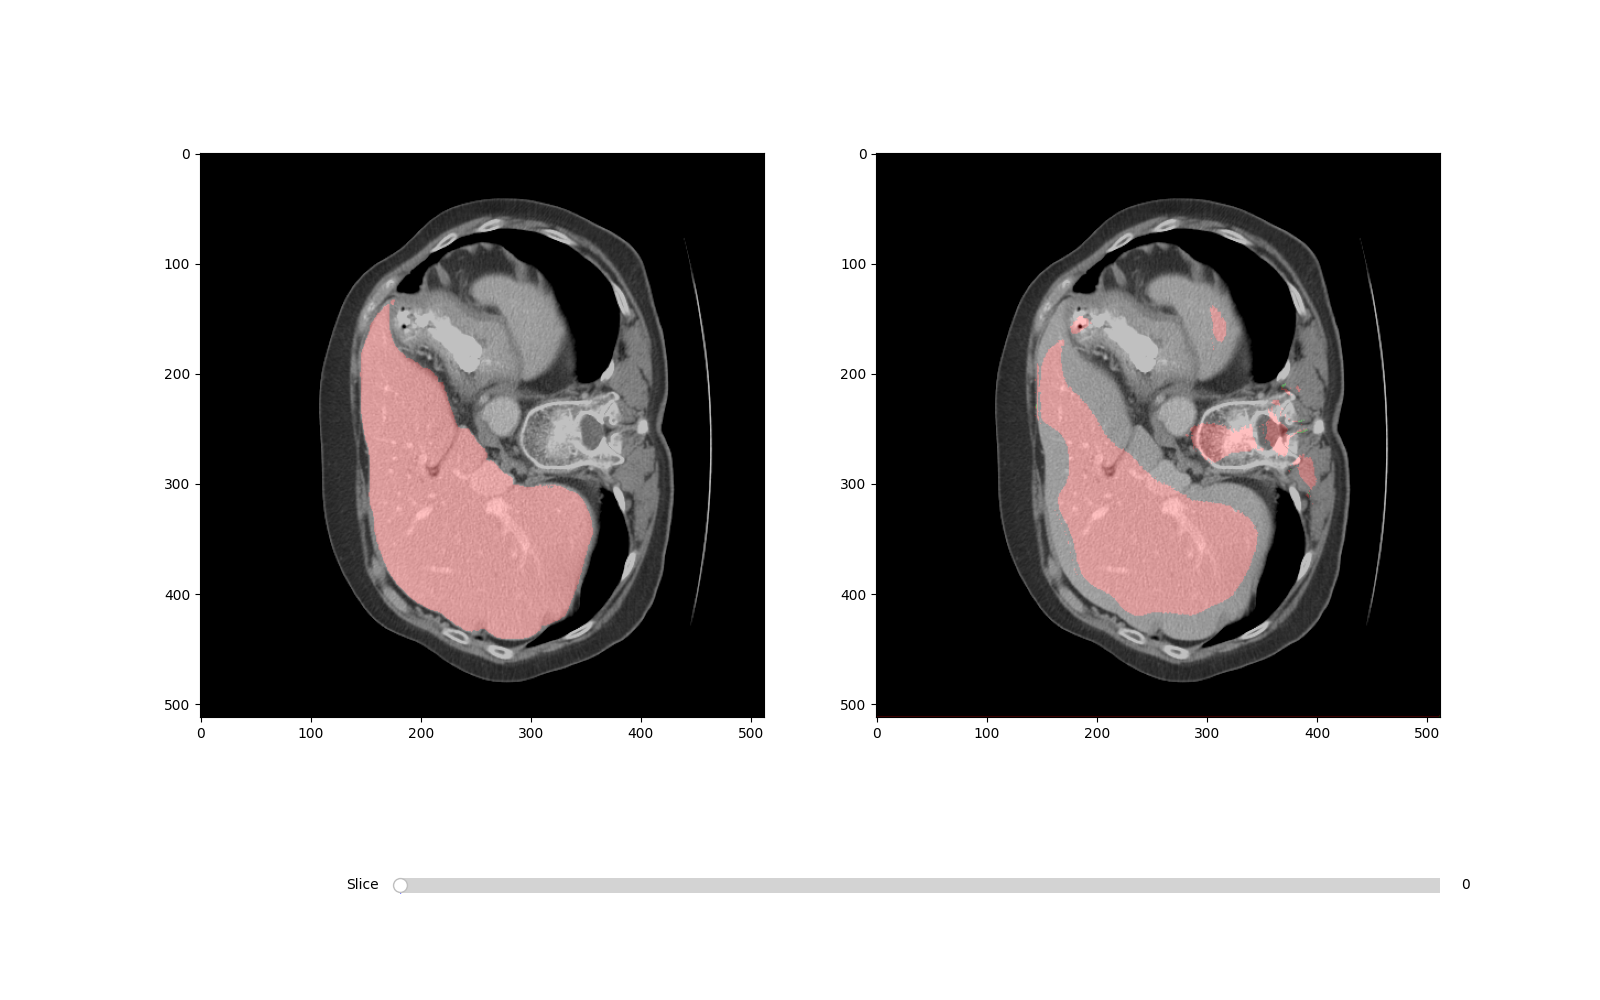

In [7]:
%matplotlib ipympl
out = mdl(vol)
out = out.squeeze(0).argmax(0)
import torch
s = compare(vol, seg, out)